# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [4]:
import pandas as pd # for creating dataframes
import numpy as np # for generating random numbers
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns # For advanced statistical plots
import random # for generating random choices
%matplotlib inline

## Step 2: Generating random data for the social media data

Create a synthetic dataset for analysis, including fields for Date, Category, and Likes.

We first define a list of categories for the social media experiment.

In [5]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

We then generate random dates using pandas to create a range of dates.

In [6]:
n = 500 # number of entries
dates = pd.date_range(start='2024-01-01', periods=n)

We also generate random categories for each entry.

In [7]:
random_categories = [random.choice(categories) for _ in range(n)]

and we generate random integers for the number of likes between 0 to 10,000.

In [8]:
random_likes = np.random.randint(0, 10000, size=n)

We finally combine the generated data to create data dictionary.

In [9]:
data = { 
    'Date':dates,
    'Category': random_categories,
    'Likes': random_likes
}

## Step 3: Loading the Data into a Pandas DataFrame and Exploring the Data

Now that we have our data generated, the next step is to load it into a Pandas DataFrame and perform some basic exploratory data analysis.

We convert our data dictionary into a Pandas DataFrame.

In [10]:
df = pd.DataFrame(data) 

Using 'df.head( )', we preview the first few rows of the DataFrame. This initial look helps verify that the data has been loaded correctly and gives a glimpse of its structure.
python


In [11]:
print(df.head())

        Date Category  Likes
0 2024-01-01  Fashion   3715
1 2024-01-02     Food   4222
2 2024-01-03  Culture    889
3 2024-01-04  Fashion   4693
4 2024-01-05  Fashion    619


We use 'df.info( )' to provide a summary of the DataFrame, including the count of non-null entries and the data types of each column. This step is crucial for identifying any missing values or inconsistencies in data types.

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB
None


We also obtain descriptive statistics for the numerical columns using 'df.describe( )'. This includes metrics such as mean, standard deviation, and range, which are essential for understanding the distribution and spread of your data.

In [13]:
print(df.describe())

             Likes
count   500.000000
mean   5053.018000
std    2894.668492
min       5.000000
25%    2563.000000
50%    5142.500000
75%    7562.500000
max    9991.000000


Finally, we print the count for each category using the 'value_counts( )'. This information is valuable for analyzing category distribution and ensuring that your dataset is representative of the various categories.



In [14]:
print(df['Category'].value_counts())

Fashion    77
Health     68
Family     68
Culture    63
Travel     63
Music      62
Fitness    50
Food       49
Name: Category, dtype: int64


## Cleaning the Data

Now that we have our data, it’s essential to clean it to ensure our analysis is accurate. Removing invalid or irrelevant data points helps us perform effective statistics and create meaningful visualizations. Fortunately, the pandas DataFrame has built-in tools to simplify this data cleaning process.

First, we need to clean up any rows with missing values. This will prevent errors and inconsistencies in our analysis.

In [15]:
df = df.dropna()

Next, we eliminate any duplicate rows. Duplicate data can skew our analysis and lead to incorrect conclusions

In [16]:
df = df.drop_duplicates()

To appropriately display the data field, we convert the 'Date' column to the datetime format using the pandas object.

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

We also ensure the 'Likes' column is in integer format. This conversion is necessary for numerical computations and visualizations.

In [18]:
df['Likes'] = df['Likes'].astype(int)

We display the cleaned DataFrame to verify changes.

In [19]:
print("Cleaned DataFrame:")
print(df.head())

Cleaned DataFrame:
        Date Category  Likes
0 2024-01-01  Fashion   3715
1 2024-01-02     Food   4222
2 2024-01-03  Culture    889
3 2024-01-04  Fashion   4693
4 2024-01-05  Fashion    619


In [20]:
print(sns.__version__)

0.12.2


## Visualizing and Analyzing the Data

Now that our data is clean, it’s time to visualize and analyze it. This helps us understand trends and gain insights.

We visualize the data using the seaborn module in a histogram plot of the Likes to see how likes are spread out. This will help us understand the distribution of likes across all entries. This is accomplished using the method histplot, passing in the dataframe field ‘Likes’ as in df[‘Likes’].

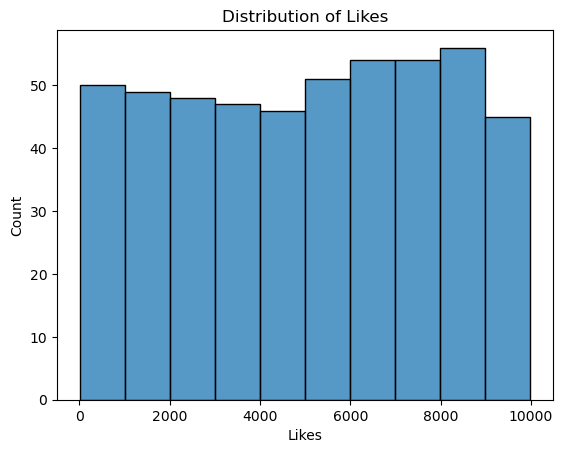

In [25]:
sns.histplot(df['Likes'])
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Count')
plt.show()

We also make a boxplot to compare likes across different categories. This will show us how likes vary between categories and highlight any outliers.

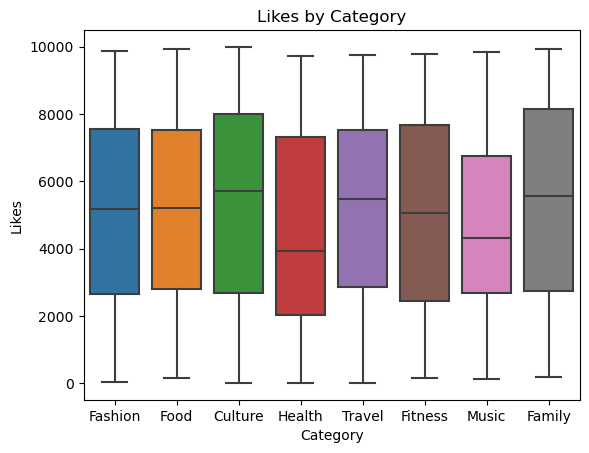

In [26]:
sns.boxplot(x='Category', y='Likes', data=df)
plt.title('Likes by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.show()

Finally, we perform some basic statistics:

1. Mean Likes: Find out the average number of likes across all posts.

In [23]:
mean_likes = df['Likes'].mean()
print(f"Average Likes: {mean_likes}")

Average Likes: 5053.018


2. Mean Likes by Category: Get the average likes for each category to see which ones are performing better.

In [24]:
mean_likes_by_category = df.groupby('Category')['Likes'].mean()
print("Average Likes by Category:")
print(mean_likes_by_category)

Average Likes by Category:
Category
Culture    5503.031746
Family     5296.794118
Fashion    5146.246753
Fitness    5109.440000
Food       5200.489796
Health     4488.852941
Music      4629.338710
Travel     5092.349206
Name: Likes, dtype: float64


## Conclusion

### Process Overview

In this project, we analyzed a simulated social media dataset to understand user engagement through the distribution of likes across different categories. The project involved several key steps:

1. __Importing Required Libraries:__ We started by importing essential Python libraries such as pandas, numpy, matplotlib, seaborn, and random, which provided us with the tools for data manipulation, numerical computations, and visualization.

2.  __Generating Random Data:__ We created a synthetic dataset of 500 entries, including random dates, categories, and likes. This simulated real-world social media data and ensured a diverse and representative dataset for analysis.

3. __Loading and Exploring the Data:__ We loaded the generated data into a Pandas DataFrame and performed exploratory data analysis. This included previewing the first few rows, summarizing the data, obtaining descriptive statistics, and analyzing category distribution.

4. __Cleaning the Data:__ We cleaned the dataset by removing any missing values and duplicate rows. We also ensured the 'Date' column was in datetime format and the 'Likes' column was in integer format.

5. __Visualizing the Data:__ We used seaborn to create visualizations, including a histogram plot to show the distribution of likes and a boxplot to compare likes across different categories. 
6. __Performing Basic Statistics:__ We calculated the average number of likes across all posts and the average likes for each category.

### Key Findings

1. __Likes Distribution:__ The histogram plot revealed that likes are relatively evenly distributed across the range, with no extreme outliers. Most posts received between 2,000 and 8,000 likes, indicating a moderate level of engagement.

2. __Category Comparison:__ The boxplot showed that while most categories have a similar range of likes, there are noticeable variations. For example, the 'Family' and 'Culture' categories have a slightly higher median number of likes compared to others.

3. __Average Likes:__ The overall average number of likes was calculated to be around 5,000. However, the average likes varied by category, with 'Family' and 'Culture' categories performing better than others.